<a href="https://colab.research.google.com/github/TiTKi1/Coursework/blob/master/%D0%9C%D0%B0%D0%BC%D0%B5%D0%B4%D0%BE%D0%B2_%D0%A0_%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0_%D1%80%D0%BE%D0%B1%D0%BE%D1%82%D0%B0_5_%D0%92_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Мамедов Руслан був присутній на парі

#Лабораторна робота 5
Розв'язання систем нелінійних рівнянь.

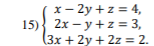

In [5]:
import numpy as np

In [6]:
a = np.array([
    [1, -2, 1],
    [2, -1, 1],
    [3, 2, 2],
])
b = np.array([[4], [3], [2]])

In [7]:
# Напиши функцію для вирішення системи методом Гауса
def solve_gausse(a, b, verbose=False):
    det = np.linalg.det(a)
    if verbose: print(f"Визначник матриці A: {round(det)}")
    if det == 0:
        print("Визначник дорівнює нулю - розв'язків немає")
        return None
    # Reading number of unknowns
    n = len(b)
    m = np.concatenate([a, b], axis=1, dtype=float)

    # Applying Gauss-Jordan Elimination
    for i in range(n):

        # Swap rows to avoid division by 0
        if m[i, i] == 0:
            for k in range(i+1, n):
                if m[k, k] != 0:
                    m[[i, k], :] = m[[k, i], :]
                    break


        if m[i, i] != 1:
            m[i, :] *= 1/m[i, i]

        for j in range(n):
            if i != j:
                ratio = m[j][i]/m[i][i]

                m[j, :] = m[j, :] - ratio * m[i, :]

    return m[:, [-1]]

print(f"Вектор рішення: \r\n {solve_gausse(a, b)}")

Вектор рішення: 
 [[ 3.33066907e-16]
 [-1.00000000e+00]
 [ 2.00000000e+00]]


# **2 частина**

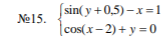

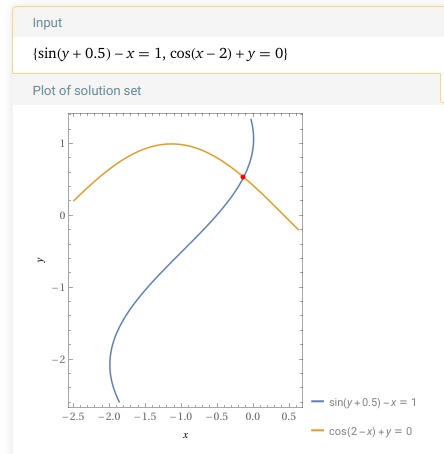

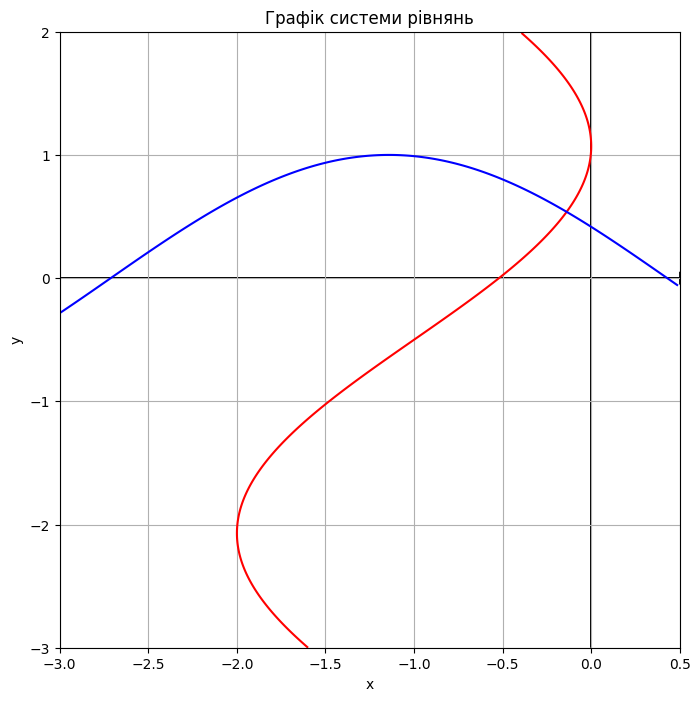

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Область значень для x та y
x_min, x_max = -3, 0.5
y_min, y_max = -3, 2
step = 0.01

# Створюємо масиви значень x та y
x, y = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

# Рівняння системи
eq1 = np.sin(y+0.5) - x - 1
eq2 = np.cos(x - 2) + y

# Створюємо графік
fig, ax = plt.subplots(figsize=(8, 8))

# Додаємо графік першого рівняння
ax.contour(x, y, eq1, levels=[0], colors='red')

# Додаємо графік другого рівняння
ax.contour(x, y, eq2, levels=[0], colors='blue')

# Налаштування графіка
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Графік системи рівнянь')

# Додаємо стрілки на кінцях осей
ax.arrow(x_min, 0, x_max - x_min, 0, head_width=0.1, head_length=0.05, fc='black', ec='black')
ax.arrow(0, y_min, 0, y_max - y_min, head_width=0.1, head_length=0.2, fc='black', ec='black')

# Додаємо сітку
plt.grid(True)

# Показуємо графік
plt.show()


In [16]:
import numpy as np
import matplotlib.pyplot as plt


In [17]:
#Розв'язок системи рівнянь методом простої ітерації
import numpy as np
from scipy import optimize

x0, y0 = -0.2, 0.55

def f1(y):
    return np.sin(y+0.5) - 1 #задаємо функції
def f2 (x):
    return -np.cos(x - 2)  #задаємо функції

#Перевірка методу на збіжність

def iter (x,y,e):
    xn = x
    yn = y
    xn1 = f2(x)
    yn1 = f1(y)
    n = 1
    while ((abs(xn1-xn)>=e) & (abs(yn1-yn) >=e)):
        xn = xn1
        yn = yn1
        xn1 = f2(yn)
        yn1 = f1(xn)
        n += 1
    print ('Simple iteration:')
    print ('x=', xn, '\ny=',yn,'\nThe amount of iteration = ',n)

iter(x0,y0,0.0001)

def f3(x): #Задаємо функцію для перевірки
    return np.sin(x[1] + 0.5) - x[0] - 1, np.cos(x[0] - 2) + x[1]

s = optimize.root(f3, [0.,0.], method = 'hybr') #Перевірка розв*язку #Відповіді
#мають співпасти
print ('Chek',s.x)

Simple iteration:
x= 0.5378210611434707 
y= -0.13852997189965144 
The amount of iteration =  15
Chek [-0.13868462  0.537853  ]


Зверніть увагу!
#Відповіді мають співпасти.

